<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 18px; text-align: center;">
  <div style="display: inline-block; border: 2px solid red; color: red; padding: 5px 10px; border-radius: 20px; font-weight: bold; font-size: 32px;">
    Nintendo Video Game Sales - Exploratory Data Analysis
  </div><br>
  <h4 style="margin: 5px 0 0 0; line-height: 1.2; font-size: 16px;">Christopher Heimbuch - <a href="https://github.com/chrisheimbuch">https://github.com/chrisheimbuch</a></h4>
  <h4 style="margin: 0; line-height: 1.2; font-size: 16px;">Dataset: <a href="https://www.kaggle.com/datasets/thedevastator/global-video-game-sales">https://www.kaggle.com/datasets/thedevastator/global-video-game-sales</a></h4>
</div>

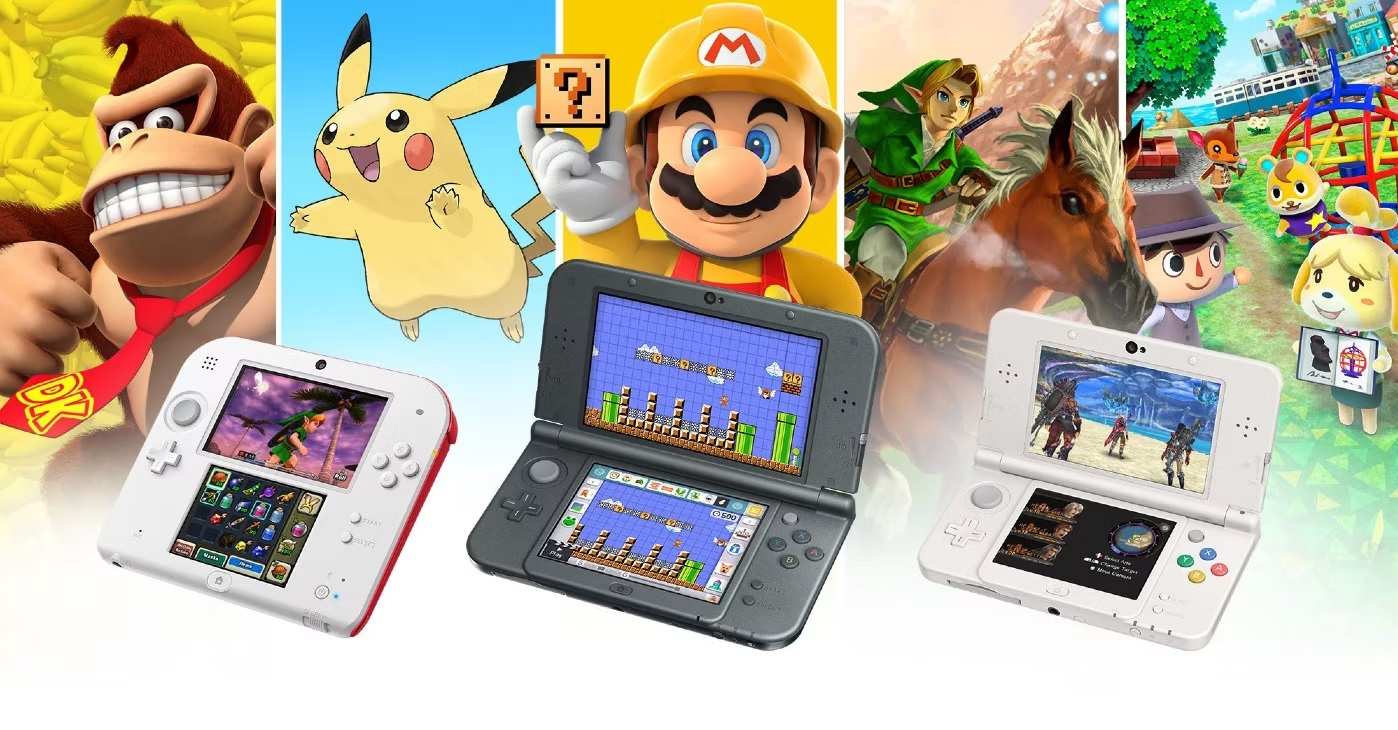

[Image link](https://static1.thegamerimages.com/wordpress/wp-content/uploads/2020/01/Nintendo-DS.jpg)

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    <h1 style="color:#FF0000;">Dataset Overview</h1>
    <p>This dataset has been sourced from <a href="https://www.vgchartz.com/">vgchartz.com</a>. The data was scraped from numerous sources to compile a dataset of many video game titles for various video game consoles with global sales over 100,000. Video game titles span all the way from 1980 - 2020!</p>
    <p>The columns that this dataset includes are:</p>
    <ul>
        <li><b>Name</b> - The name of the video game titles.</li>
        <li><b>Platform</b> - The Console associated with the videogame title. (Example: Gamecube, PS1, PS2 etc.)</li>
        <li><b>Year</b> - The year the video game was released.</li>
        <li><b>Genre</b> - What type of category/genre the video game is.</li>
        <li><b>Publisher</b> - Which company has published the video game.</li>
        <li><b>NA_Sales</b> - How many sales were in the United States, in millions.</li>
        <li><b>EU_Sales</b> - How many sales were in the Europe, in millions.</li>
        <li><b>JP_Sales</b> - How many sales were in the Japan, in millions.</li>
        <li><b>Other_Sales</b> - How many sales were in the other countries/regions, in millions.</li>
        <li><b>Global_Sales</b> - Total sales across all regions, in millions.</li>
    </ul>
    <p><b>Note</b>: This dataset analysis only contains data up to 2017 and does not include data on the Nintendo Switch.</p>
</div>

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style="color: #FF0000; font-size: 20px; font-weight: bold;">Section 1: Read, Clean, and Learn about the Data</span><br>

</div>

In [38]:
#Import in standard libraries to help with the analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [39]:
#Set 'df' as our dataframe variable, reading in the 'vgsales.csv' document.

df = pd.read_csv("vgsales.csv", encoding='latin-1')

In [40]:
#Check to make sure information loaded correctly and start to get familiar with our data.

df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [41]:
#Call info() method to check for data types and potential null values. Null values spotted in 'Year' and 'Publisher'.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [42]:
#Check for total amount of null values and in their respective categories.

df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [43]:
#Inspect the "Year" columns NaN values to determine how to handle them! This could be useful data, I will replace them.

df[df['Year'].isna()]

Rank                         Name Platform  Year         Genre  \
179      180              Madden NFL 2004      PS2   NaN        Sports   
377      378             FIFA Soccer 2004      PS2   NaN        Sports   
431      432   LEGO Batman: The Videogame      Wii   NaN        Action   
470      471   wwe Smackdown vs. Raw 2006      PS2   NaN      Fighting   
607      608               Space Invaders     2600   NaN       Shooter   
...      ...                          ...      ...   ...           ...   
16307  16310                Freaky Flyers       GC   NaN        Racing   
16327  16330                    Inversion       PC   NaN       Shooter   
16366  16369  Hakuouki: Shinsengumi Kitan      PS3   NaN     Adventure   
16427  16430                 Virtua Quest       GC   NaN  Role-Playing   
16493  16496                   The Smurfs      3DS   NaN        Action   

                                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
179                           Electronic Arts      4.26      0.26      0.01   
377                           Electronic Arts      0.59      2.36      0.04   
431    Warner Bros. Interactive Entertainment      1.86      1.02      0.00   
470                                       NaN      1.57      1.02      0.00   
607                                     Atari      2.36      0.14      0.00   
...                                       ...       ...       ...       ...   
16307                                 Unknown      0.01      0.00      0.00   
16327                      Namco Bandai Games      0.01      0.00      0.00   
16366                                 Unknown      0.01      0.00      0.00   
16427                                 Unknown      0.01      0.00      0.00   
16493                                 Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
179           0.71          5.23  
377           0.51          3.49  
431           0.29          3.17  
470           0.41          3.00  
607           0.03          2.53  
...            ...           ...  
16307         0.00          0.01  
16327         0.00          0.01  
16366         0.00          0.01  
16427         0.00          0.01  
16493         0.00          0.01  

[271 rows x 11 columns]

In [44]:
#Inspect the 'Publisher' columns NaN values. These could potentially serve useful for our EDA as well!

df[df['Publisher'].isna()]

Rank                                               Name Platform  \
470      471                         wwe Smackdown vs. Raw 2006      PS2   
1303    1305                                     Triple Play 99       PS   
1662    1664       Shrek / Shrek 2 2-in-1 Gameboy Advance Video      GBA   
2222    2224                                 Bentley's Hackpack      GBA   
3159    3161  Nicktoons Collection: Game Boy Advance Video V...      GBA   
3166    3168  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
3766    3768  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
4145    4147                                 Sonic the Hedgehog      PS3   
4526    4528  The Fairly Odd Parents: Game Boy Advance Video...      GBA   
4635    4637  The Fairly Odd Parents: Game Boy Advance Video...      GBA   
5302    5304      Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)      Wii   
5647    5649  Cartoon Network Collection: Game Boy Advance V...      GBA   
6272    6274  The Legend of Zelda: The Minish Cap(weekly JP ...      GBA   
6437    6439           Sonic X: Game Boy Advance Video Volume 1      GBA   
6562    6564  Dora the Explorer: Game Boy Advance Video Volu...      GBA   
6648    6650  Cartoon Network Collection: Game Boy Advance V...      GBA   
6849    6851     All Grown Up!: Game Boy Advance Video Volume 1      GBA   
7208    7210  Nicktoons Collection: Game Boy Advance Video V...      GBA   
7351    7353                     Yu Yu Hakusho: Dark Tournament      PS2   
7470    7472  SpongeBob SquarePants: Game Boy Advance Video ...      GBA   
7953    7955                   Thomas the Tank Engine & Friends      GBA   
8330    8332    Dragon Ball GT: Game Boy Advance Video Volume 1      GBA   
8341    8343  Codename: Kids Next Door: Game Boy Advance Vid...      GBA   
8368    8370  Teenage Mutant Ninja Turtles: Game Boy Advance...      GBA   
8503    8505                                       Stronghold 3       PC   
8770    8772  Cartoon Network Collection: Game Boy Advance V...      GBA   
8848    8850  PokÃ©mon: Johto Photo Finish: Game Boy Advance...      GBA   
8896    8898  Strawberry Shortcake: Game Boy Advance Video V...      GBA   
9517    9519                             Farming Simulator 2011       PC   
9749    9751  Super Robot Wars OG Saga: Masou Kishin II - Re...      PSP   
10382  10384                   Disney Channel Collection Vol. 1      GBA   
10494  10496             Atsumare! Power Pro Kun no DS Koushien       DS   
11076  11078                       Action Man-Operation Extreme       PS   
11526  11528  Cartoon Network Collection: Game Boy Advance V...      GBA   
12487  12489                               Chou Soujuu Mecha MG       DS   
12517  12519       Prinny: Can I Really Be The Hero? (US sales)      PSP   
13278  13280                     Monster Hunter Frontier Online      PS3   
13672  13674                          B.L.U.E.: Legend of Water       PS   
13962  13964                                     World of Tanks     X360   
14087  14089                                       Housekeeping       DS   
14296  14299                                Bikkuriman Daijiten       DS   
14311  14314                                      Silverlicious       DS   
14698  14701                                 UK Truck Simulator       PC   
14942  14945  Umineko no Naku Koro ni San: Shinjitsu to Gens...      PS3   
15056  15059                                            Xia-Xia       DS   
15261  15264                                       Mario Tennis      3DS   
15325  15328  Nicktoons Collection: Game Boy Advance Video V...      GBA   
15353  15356                   Demolition Company: Gold Edition       PC   
15788  15791  Moshi, Kono Sekai ni Kami-sama ga Iru to suru ...      PSV   
15915  15918                                       Dream Dancer       DS   
16191  16194                    Homeworld Remastered Collection       PC   
16198  16201             AKB1/48: Idol to Guam de Koishi

In [45]:
#Create a copy of original dataset - just incase we need to reference.

df_copy = df.copy()

In [46]:
#Sanity check to make sure it worked properly.

df_copy.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [47]:
#Fill in the 'Publisher' columns null values with "Unknown" string, in the "df_copy" dataframe.

df_copy['Publisher'].fillna("Unknown", inplace=True)

In [48]:
#Sanity check to examine that null values have filled in properly.

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [49]:
#Fill in "Year" columns null values with 0 int.

df_copy['Year'].fillna(0, inplace=True)

In [53]:
#Sanity check to see years were converted. Should convert all years to not be a float.

df_copy['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
0        271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [54]:
#Make all years a int data type and not float.

df_copy['Year'] = df_copy['Year'].astype(int)

In [55]:
#Sanity check.

df_copy['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
0        271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [56]:
#Check to see if null values still exist in "df_copy" dataframe, and they don't!

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int32  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [57]:
#Clean up a few columnds data for clarity.
df_copy['Platform'] = df_copy['Platform'].replace("GB", "Gameboy")
df_copy['Platform'] = df_copy['Platform'].replace("GBA", "Gameboy Advance")
df_copy['Platform'] = df_copy['Platform'].replace("GC", "GameCube")
df_copy['Publisher'] = df_copy['Publisher'].replace("Warner Bros. Interactive Entertainment", "Warner Bros")

In [58]:
#Drop the 2020 data, as this project I am only focusing up to 2017, where most data goes up to.
index_to_drop = df_copy[df_copy['Year'] == 2020].index
df_copy.drop(index_to_drop, inplace=True)

In [59]:
#Confirming changes completed!
df_copy

Rank                                              Name  \
0          1                                        Wii Sports   
1          2                                 Super Mario Bros.   
2          3                                    Mario Kart Wii   
3          4                                 Wii Sports Resort   
4          5                          Pokemon Red/Pokemon Blue   
...      ...                                               ...   
16593  16596                Woody Woodpecker in Crazy Castle 5   
16594  16597                     Men in Black II: Alien Escape   
16595  16598  SCORE International Baja 1000: The Official Game   
16596  16599                                        Know How 2   
16597  16600                                  Spirits & Spells   

              Platform  Year         Genre   Publisher  NA_Sales  EU_Sales  \
0                  Wii  2006        Sports    Nintendo     41.49     29.02   
1                  NES  1985      Platform    Nintendo     29.08      3.58   
2                  Wii  2008        Racing    Nintendo     15.85     12.88   
3                  Wii  2009        Sports    Nintendo     15.75     11.01   
4              Gameboy  1996  Role-Playing    Nintendo     11.27      8.89   
...                ...   ...           ...         ...       ...       ...   
16593  Gameboy Advance  2002      Platform       Kemco      0.01      0.00   
16594         GameCube  2003       Shooter  Infogrames      0.01      0.00   
16595              PS2  2008        Racing  Activision      0.00      0.00   
16596               DS  2010        Puzzle    7G//AMES      0.00      0.01   
16597  Gameboy Advance  2003      Platform     Wanadoo      0.01      0.00   

       JP_Sales  Other_Sales  Global_Sales  
0          3.77         8.46         82.74  
1          6.81         0.77         40.24  
2          3.79         3.31         35.82  
3          3.28         2.96         33.00  
4         10.22         1.00         31.37  
...         ...          ...           ...  
16593      0.00         0.00          0.01  
16594      0.00         0.00          0.01  
16595      0.00         0.00          0.01  
16596      0.00         0.00          0.01  
16597      0.00         0.00          0.01  

[16597 rows x 11 columns]

In [60]:
df_copy['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000,    0, 1995, 2016,
       1991, 1981, 1987, 1980, 1983, 2017])

In [61]:
#Check unique publishers - there are many. This can help answer questions for Nintendo.

df_copy['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros', 'Universal Interactive',
       'Eidos Interactive', 'RedOctane', 'Vivendi Games',
       'Enix Corporation', 'Namco Bandai Games', 'Palcom',
       'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Unknown', 'Majesco Entertainment', 'Codemasters', 'Red Orb',
       'Level 5', 'Arena Entertainment', 'Midway Games', 'JVC',
       'Deep Silver', '989 Studios', 'NCSoft', 'UEP Systems',
       'Parker Bros.', 'Maxis', 'Imagic', 'Tecmo Koei', 'Valve Software',
       'ASCII Entertainment', 'Mindscape', '

In [62]:
#Check unique platforms. This also can help answer questions for Nintendo.

df_copy['Platform'].unique()

array(['Wii', 'NES', 'Gameboy', 'DS', 'X360', 'PS3', 'PS2', 'SNES',
       'Gameboy Advance', '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600',
       'PSP', 'XOne', 'GameCube', 'WiiU', 'GEN', 'DC', 'PSV', 'SAT',
       'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

In [63]:
#Check unique genre's. This can help us as well.

df_copy['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style="color: #FF0000; font-size: 20px; font-weight: bold;">Section 2. Descriptive Questions to Learn More!</span><br>

</div>

In [64]:
#Global Mask Functions for helping with our analysis.

def MASK_GLOBAL_SALES(number=5):
    """Takes an int input and filters the dataframe based on global sales greater than the integer provided."""
    return df_copy[df_copy['Global_Sales'] > number]

def MASK_PUBLISHER(publisher):
    """Takes an input as a string and filters the dataframe based on a particular publisher"""
    return df_copy[df_copy['Publisher'] == publisher]

def MASK_NAME_TITLE(game_title):
    """
    Takes an input as a string and filters the dataframes 'Name' column to
    return any games that contain the string provided.
    """
    return df_copy[df_copy['Name'].str.contains(game_title)]

def MASK_PUBLISHER_GENRE(publisher, genre):
    """
    Filters the dataframe based on publisher and genre columns.
 
    Args:
        publisher (str): The first string.
        genre (str): The second string.
 
    Returns:
        Dataframe filtered for those coclumns
    """
    return df_copy[(df_copy['Publisher'] == publisher) & (df_copy['Genre'] == genre)]

def MASK_PUBLISHER_TWO(publisher):
    """Takes an input as a string and filters the dataframe so it does not include a particular publisher"""
    return df_copy[df_copy['Publisher'] != publisher]
                                                        

## 1. What are the top 10 games with the highest sales?

In [65]:
#Check out data and see if it's what we want to plot.
MASK_GLOBAL_SALES(15)[:10]

Rank                       Name Platform  Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue  Gameboy  1996  Role-Playing  Nintendo   
5     6                     Tetris  Gameboy  1989        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006      Platform  Nintendo   
7     8                   Wii Play      Wii  2006          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

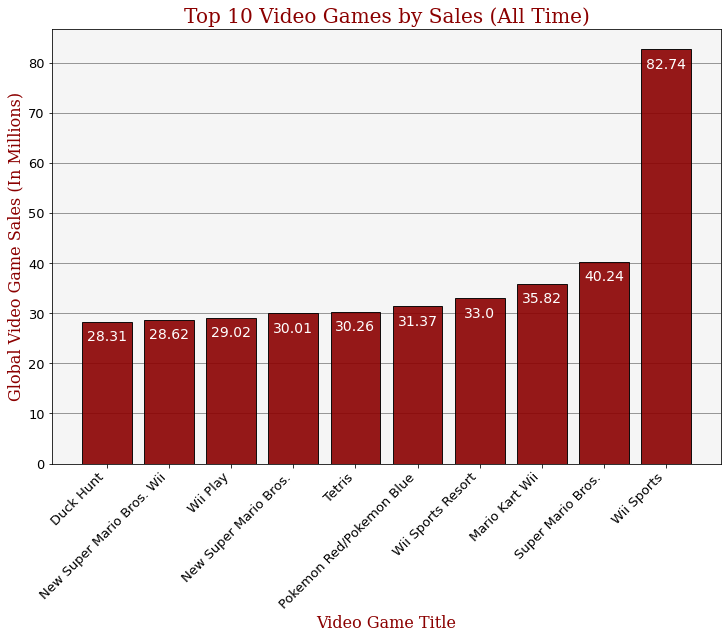

In [66]:
#Data sorting and setting up for plotting.
Top_Ten_Games = MASK_GLOBAL_SALES(15)[:10]

#Create label making function for labeling each bar in graph.
def addlabels(games,sales):
    for game in range(len(games)):
        plt.text(game, sales[game] - 3, sales[game], ha = 'center', va='center', color='white', fontsize=14)
        
        
#Custom Fonts
font1 = {'family':'serif','color':'darkred','size':20}
font2 = {'family':'serif','color':'darkred','size':16}


#Create the plot, add y axis gridlines, change background color.
fig, ax = plt.subplots(figsize=(12,8))
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('whitesmoke')


#Model data and set the name of the title, x, and y axis.
ax.bar(x=Top_Ten_Games['Name'], height=Top_Ten_Games['Global_Sales'],alpha=0.9, zorder=3, color='darkred', edgecolor='black')
ax.set_title("Top 10 Video Games by Sales (All Time)", fontdict=font1)
ax.set_xlabel("Video Game Title", fontdict=font2, ha="center")
ax.set_ylabel("Global Video Game Sales (In Millions)", fontdict=font2, ha="center")


#Adjust the order of the x axis from least to most, rotate the x axis names by 45 degrees for viewing, change font size of x/y axis .
plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)
plt.gca().invert_xaxis()
addlabels(Top_Ten_Games['Name'], Top_Ten_Games['Global_Sales'])

plt.show()

## 2. Which Nintendo Platform has the highest video game sales?

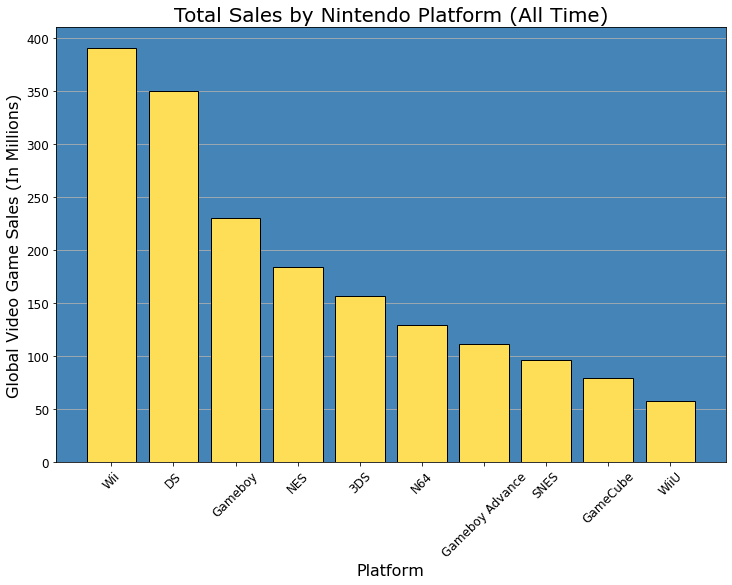

In [67]:
#Still need to style

#Data sorting and setting up for plotting.
Platform_Sales = MASK_PUBLISHER('Nintendo')
Total_Platform_Sales = Platform_Sales.groupby(['Platform'], as_index=False)['Global_Sales'].sum().sort_values('Global_Sales')

#Custom Fonts
font1 = {'family':'verdana','color':'#000000','size':20}
font2 = {'family':'verdana','color':'#000000','size':16}

#Create the plot, set x & y axis titles, and graph title.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=Total_Platform_Sales['Platform'], height=Total_Platform_Sales['Global_Sales'], color='#ffde57', edgecolor='black', zorder=3)
ax.set_title("Total Sales by Nintendo Platform (All Time)", fontdict=font1)
ax.set_xlabel("Platform", fontdict=font2)
ax.set_ylabel("Global Video Game Sales (In Millions)",fontdict=font2)

#Plot Styling for axes ticks, background image.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_xaxis()
ax.set_facecolor('#4584b6')

ax.grid(axis='y')
plt.xticks(rotation=45, ha='center')

plt.show()

## 3. Which region has the best performing sales for "Mario" titles?

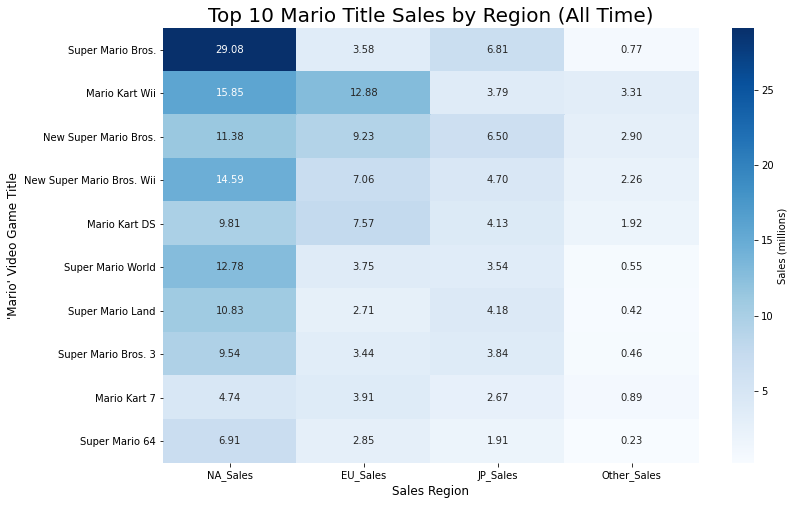

In [68]:
#Data sorting and setting up for plotting.
Mario_Sales_by_Region = (MASK_NAME_TITLE("Mario")[:10])[["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
Mario_Sales_by_Region.set_index('Name', inplace=True)

#Create the heatmap
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Mario_Sales_by_Region, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'label': 'Sales (millions)'})

#Customize the axes
plt.title("Top 10 Mario Title Sales by Region (All Time)", fontsize=20)
plt.xlabel("Sales Region", fontsize=12)
plt.ylabel("'Mario' Video Game Title", fontsize=12)
plt.show()

## 4. Which Genre has the highest sales for Nintendo?

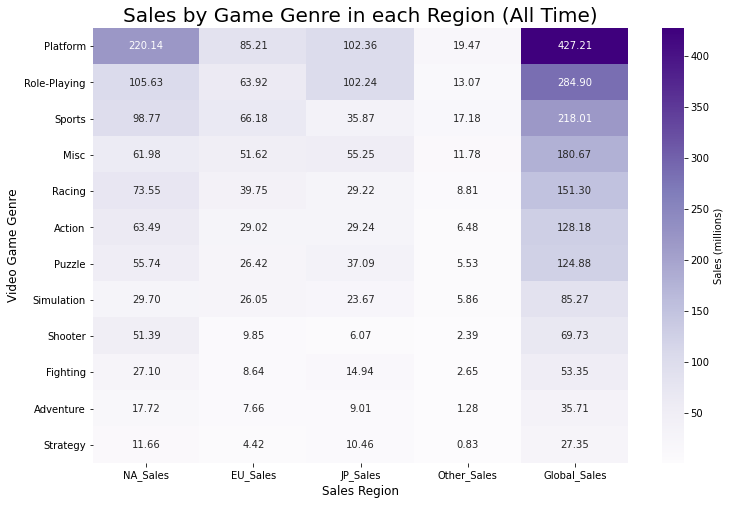

In [69]:
#Create the variable slicing for modeling the genre's and their sales.
Total_Genre_Sales = Platform_Sales.groupby(['Genre'], as_index=True)[['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales",'Global_Sales']].sum().sort_values('Global_Sales', ascending=False)

#Create the heatmap.
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(Total_Genre_Sales, annot=True, cmap='Purples', fmt='.2f', cbar_kws={'label': 'Sales (millions)'})

#Customize the axes.
plt.title("Sales by Game Genre in each Region (All Time)", fontsize=20)
plt.xlabel("Sales Region", fontsize=12)
plt.ylabel("Video Game Genre", fontsize=12)

plt.show()

## 5. Which competitors have high sales compared to Nintendo from in recent years?

In [70]:
#All data in tabular format where year is greater than 2015 (most recent).
Greater_Than_2015

Rank                                               Name Platform  \
33        34                          Call of Duty: Black Ops 3      PS4   
77        78                                            FIFA 16      PS4   
92        93                       Star Wars Battlefront (2015)      PS4   
101      102                          Call of Duty: Black Ops 3     XOne   
109      110                                          Fallout 4      PS4   
...      ...                                                ...      ...   
16565  16568                                          Teslagrad      PSV   
16569  16572                                 Resident Evil 4 HD     XOne   
16570  16573                      Farming 2017 - The Simulation      PS4   
16576  16579                                  Rugby Challenge 3     XOne   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

       Year         Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
33     2015       Shooter            Activision      5.77      5.81      0.35   
77     2015        Sports       Electronic Arts      1.11      6.06      0.06   
92     2015       Shooter       Electronic Arts      2.93      3.29      0.22   
101    2015       Shooter            Activision      4.52      2.09      0.01   
109    2015  Role-Playing    Bethesda Softworks      2.47      3.15      0.24   
...     ...           ...                   ...       ...       ...       ...   
16565  2015      Platform            Rain Games      0.00      0.01      0.00   
16569  2016       Shooter                Capcom      0.01      0.00      0.00   
16570  2016    Simulation     UIG Entertainment      0.00      0.01      0.00   
16576  2016        Sports  Alternative Software      0.00      0.01      0.00   
16589  2016        Action       dramatic create      0.00      0.00      0.01   

       Other_Sales  Global_Sales  
33            2.31         14.24  
77            1.26          8.49  
92            1.23          7.67  
101           0.67          7.30  
109           1.10          6.96  
...            ...           ...  
16565         0.00          0.01  
16569         0.00          0.01  
16570         0.00          0.01  
16576         0.00          0.01  
16589         0.00          0.01  

[961 rows x 11 columns]

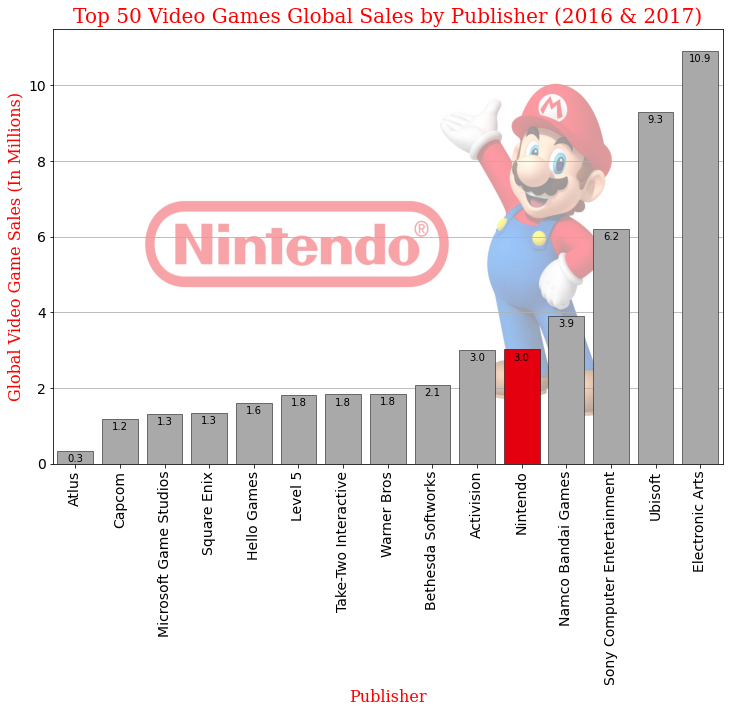

In [71]:
#Data sorting and setting up for plotting.
Greater_Than_2015 = df_copy[df_copy['Year'] > 2015]
Sales_By_Publisher_2015_And_Greater = Greater_Than_2015[:50].groupby(['Publisher'], as_index=False).sum()[['Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales",'Global_Sales']].sort_values('Global_Sales')

#Custom Fonts & Color Map for Bars in Graph.
font1 = {'family':'serif','color':'red','size':20}
font2 = {'family':'serif','color':'red','size':16}
color_mapping = ['darkgray' for bar in range(15)]
color_mapping[10] = ('#e4000f')

#Create the plot, set x & y axis titles, and graph title.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=Sales_By_Publisher_2015_And_Greater, x=Sales_By_Publisher_2015_And_Greater['Publisher'], height=Sales_By_Publisher_2015_And_Greater['Global_Sales'], zorder=3, color=color_mapping, edgecolor='black', linewidth=0.5)
ax.set_xlabel("Publisher", fontdict=font2)
ax.set_ylabel("Global Video Game Sales (In Millions)",  fontdict=font2)
ax.set_title("Top 50 Video Games Global Sales by Publisher (2016 & 2017)", fontdict=font1)

#Plot Styling for axes ticks, background image. 
ax.invert_xaxis()
plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis='y')
background = plt.imread(r'C:\Users\Chris\Desktop\nintendo_logo.jpg')
ax.imshow(background, extent=[-0.5, 14.5, 0, 11.5], aspect='auto', alpha=0.4)

# Annotate each bar

for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height - 0.08, 
        f'{height:.1f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=10)

plt.show()

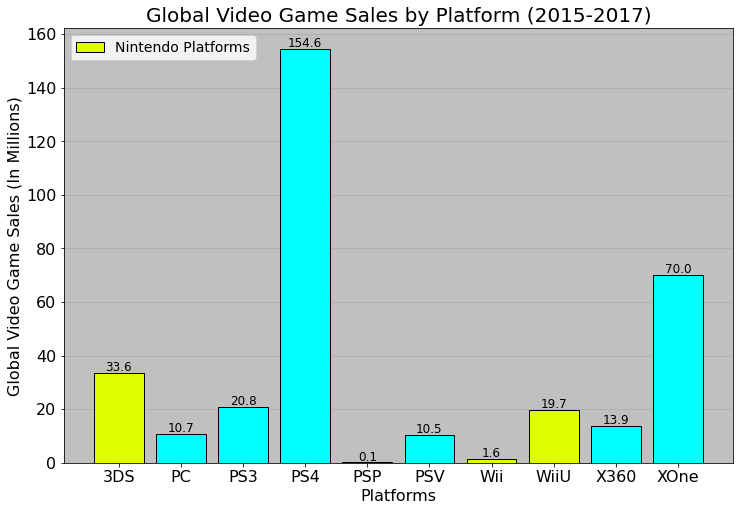

In [72]:
#Data sorting and setting up for plotting.
Greater_Than_2015 = df_copy[df_copy['Year'] >= 2015]
Platform_Sales_From_2015 = Greater_Than_2015.groupby('Platform', as_index=False)[['Platform', 'Global_Sales']].sum()

#Create a color map variable for bar styling.
color_map = ['cyan' for bar in range(10)]
color_map[0] = color_map[6] = color_map[7] =('#DFFF00')

#Create the plot and barchart, set axis names and styling.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(data=Platform_Sales_From_2015, x=Platform_Sales_From_2015['Platform'], height=Platform_Sales_From_2015['Global_Sales'],zorder=3, color=color_map, edgecolor='black')
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Global Video Game Sales (In Millions)", fontsize=16)
ax.set_title("Global Video Game Sales by Platform (2015-2017)", fontsize=20)

#Change styling of x and y axis ticks, add in grid background, adjust grid face color, add legend.
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.grid(axis='y', color='gray', alpha=0.3)
ax.set_facecolor('#C0C0C0')
plt.legend(['Nintendo Platforms'], loc='upper left', fontsize=14)  

# Annotate each bar with the global sales above the top of the bar.
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 4.5, 
        f'{height:.1f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=12)

plt.show()

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style="color: #FF0000; font-size: 20px; font-weight: bold;">Section 3: Analysis & Recommendation</span><br>

</div>

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">

<b><u>Analysis</u></b><br>
    
Nintendo has been one of the best selling video game companies of all time, with success dating back to 1985 with the super successful launch of the Nintendo Entertainment System and the Super Mario Bros Brand that remains immensely competitive to this day. It is clear from our data analysis that "Mario" branded video games is a dominant revenue stream for Nintendo, having 4 titles in the top 10 video games with best global sales. Subsequently, this was also indicated as most "Mario" branded video games are platformers, which our data visualization has shown that platformer genres are the best performing genre for every region in which we have data for, in our dataset. 

The trend for Nintendo platforms appears that handheld consoles (I.E. Gameboy, Gameboy Advance, 3DS, etc.) have had video games with increasing sales as time goes on year over year when compared to traditional "at-home" platforms, such as the Gamecube and N64. This may suggest that the target market is moving towards hand-held devices for their gaming experience as time continues.
    
Additionally, when looking at the top 50 global video game sales and comparing Nintendo's competitors, the marketplace is very competitive with competition such as the Playstation 4 and Xbox One which is pulling sales numbers and revenue away from Nintendo. Among the top 15 companies with video game sales ranging more recently from 2016 - 2017, Nintendo ranks #5 of 15, which is very competitive. However, Nintendo is in a great position and I believe has opportunity to grow.
    
<br>

<br><b><u>Recommendation</u></b><br>
    
With video game sales increasing with hand-held consoles as time increases and with Wii video game sales being so high, this could be a good indicator on the next generation console. I recommend investing more money into Research and Development for the next generation console. The data suggests that there is still a huge demand for 'at-home' consoles and there is also a huge demand for 'hand-held' consoles. A hybrid approach may work best for the next generation console, where the user experience can be at home if desired, or on the go. 'Mario' themed games are a huge revenue source for Nintendo, and I recommend to continue building upon the brand and franchise, as historical sales data for Platform, Role-Playing, and Sports genres are the best performing genres in North America, Europe, and Japan. Subsequently, I recommend putting additional capital into market research for the European and Japanese markets, as sales are not performing as well when compared to North America. We need to understand why, and change our strategy accordingly. Additionally, funding for market research in North America is appropriate as Nintendo is very competitive, with their highest sales numbers being in the North American market. Nintendo can continue to keep their competitive edge and strengthen it by identifying new trends within the target market and strategize towards them. In addition, I recommend Nintendo to create new titles in the Roleplaying and Platformer genres, not just for "Mario" titles. These have been the best performing genres historically of all video games, which indicates that these are very popular genres for the target market in all regions. Focusing on creating new video games in these categories may help bring even more revenue in for Nintendo. Finally, I recommend to negotiate with more game studios to bring their video games to Nintendo platforms. Playstation 4 and Xbox One have substantially more sales when compared to the Nintendo 3DS, Wii, and WiiU. Building and leveraging existing relationships to increase sales by creating new titles for Nintendo platforms can help increase sales and revenue for the company.
    
</div>

<div style="background-color: #f9f9f9; border: 2px solid #ccc; padding: 15px; font-family: 'Georgia', serif; font-size: 14px;">
    
<span style="color: #FF0000; font-size: 20px; font-weight: bold;">Section 4: Appendix</span><br>

</div>

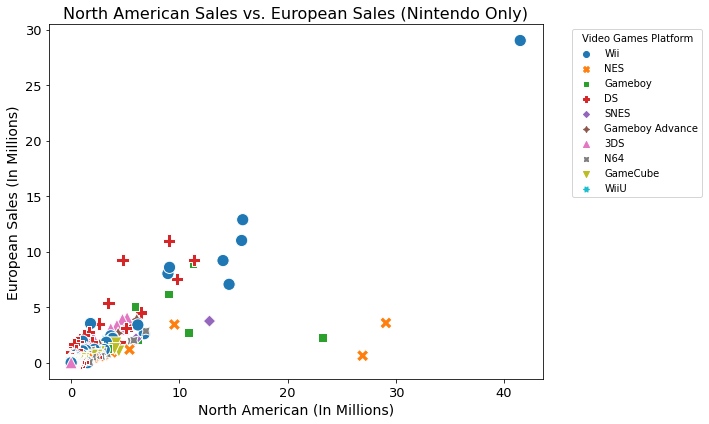

In [73]:
# Relationship analysis for Nintendo's sales by region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Platform_Sales, x='NA_Sales', y='EU_Sales', hue='Platform', style='Platform', s=150)
plt.title("North American Sales vs. European Sales (Nintendo Only)", fontsize=16)
plt.xlabel('North American (In Millions)', fontsize=14)
plt.ylabel('European Sales (In Millions)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

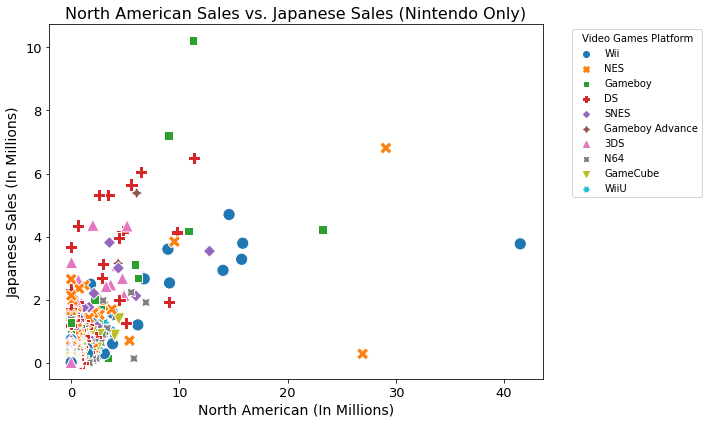

In [74]:
# Relationship analysis for Nintendo's sales by region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Platform_Sales, x='NA_Sales', y='JP_Sales', hue='Platform', style='Platform', s=150)
plt.title("North American Sales vs. Japanese Sales (Nintendo Only)", fontsize=16)
plt.xlabel('North American (In Millions)', fontsize=14)
plt.ylabel('Japanese Sales (In Millions)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

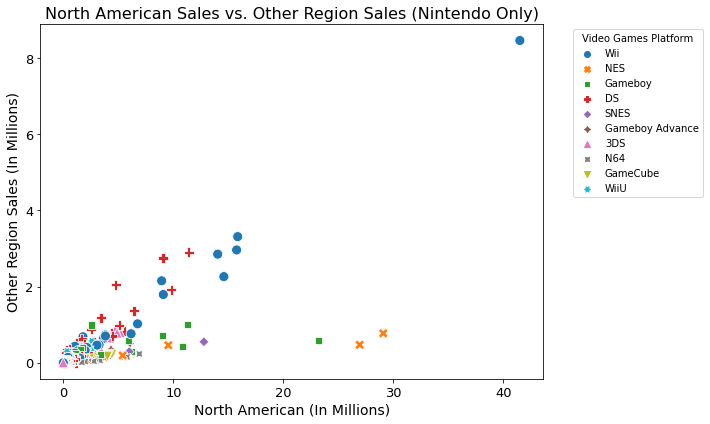

In [75]:
# Relationship analysis for Nintendo's sales by region
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Platform_Sales, x='NA_Sales', y='Other_Sales', hue='Platform', style='Platform', s=100)
plt.title("North American Sales vs. Other Region Sales (Nintendo Only)", fontsize=16)
plt.xlabel('North American (In Millions)', fontsize=14)
plt.ylabel('Other Region Sales (In Millions)', fontsize=14)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

plt.show()

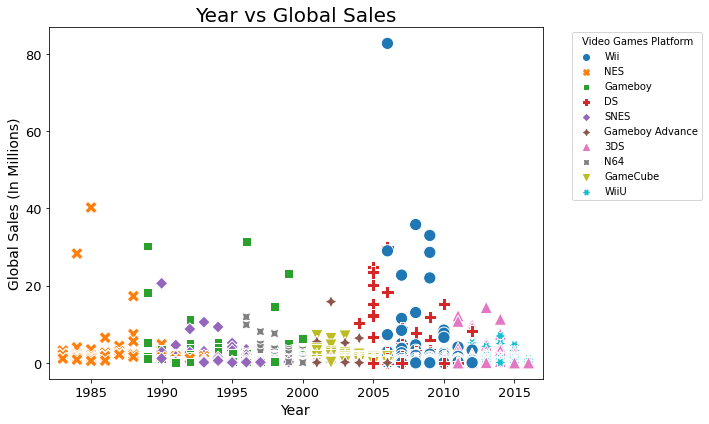

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Platform_Sales, x='Year', y='Global_Sales', hue='Platform', style='Platform', s=150)
plt.title("Year vs Global Sales", fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (In Millions)', fontsize=14)
plt.xlim(1982, 2017)
plt.legend(title='Video Games Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

plt.show()